### 3. Find Optimal Topic Count

ref: https://radimrehurek.com/gensim/models/ldamodel.html

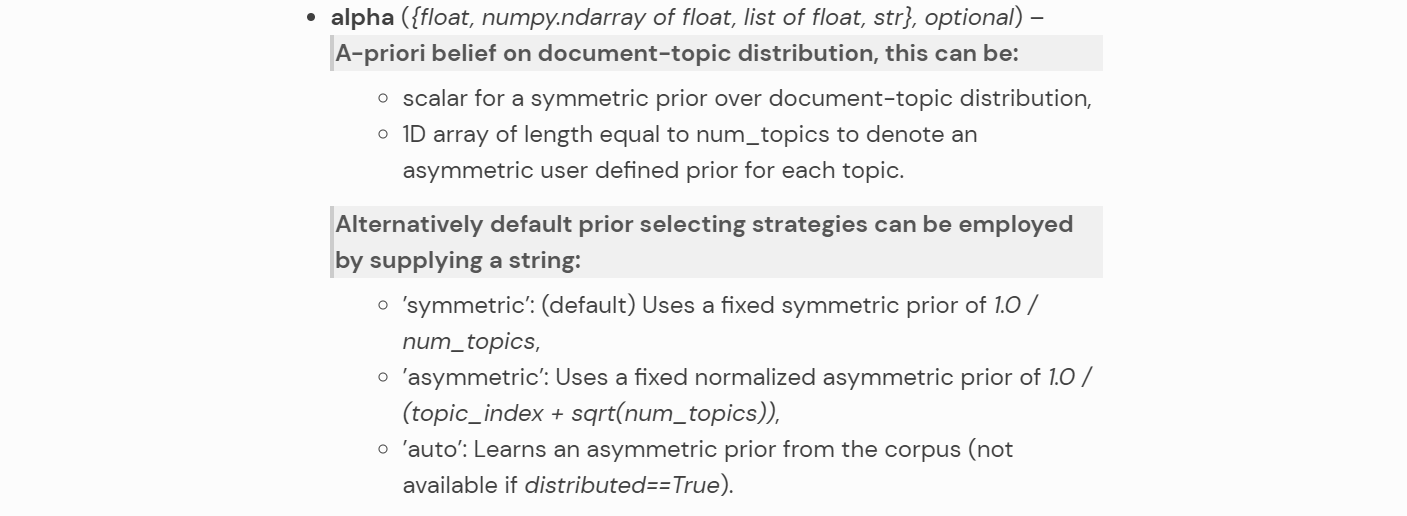

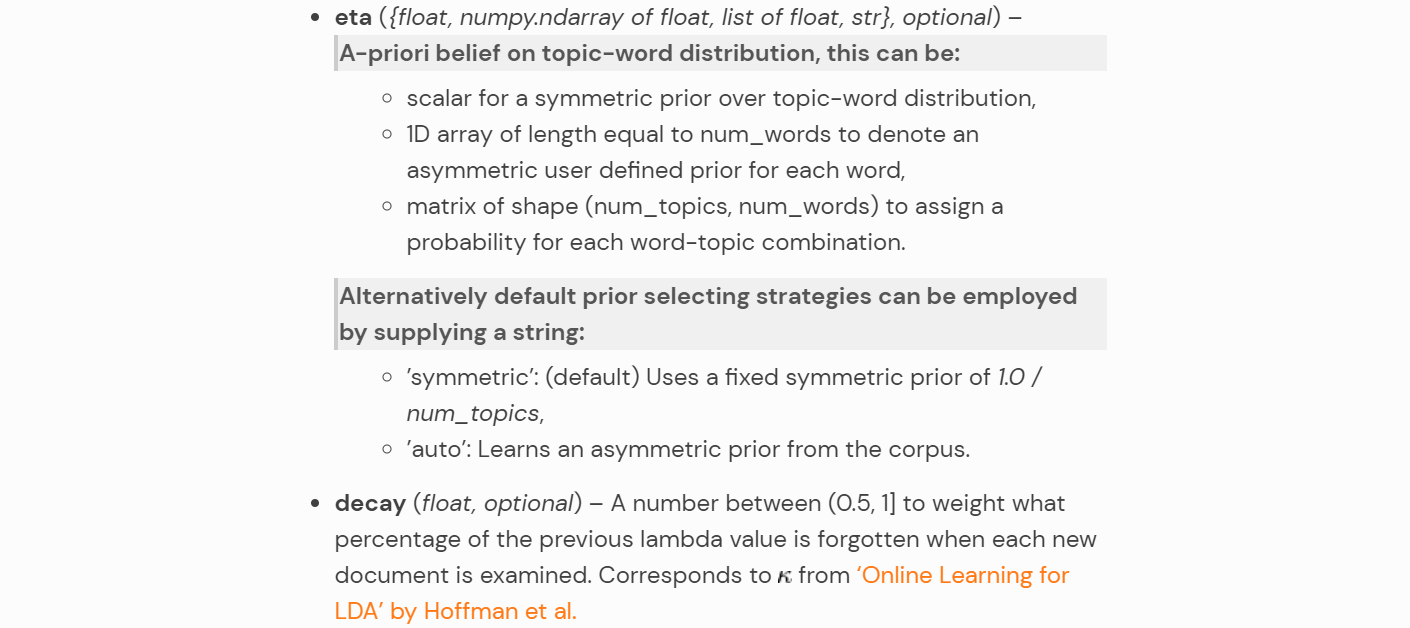

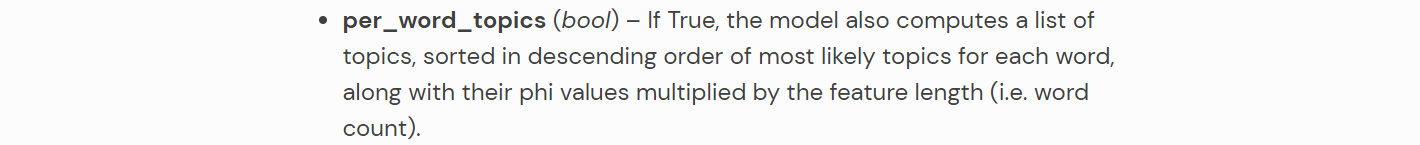

In [1]:
import time
import ast

start_time = time.time()

In [2]:
import pandas as pd 
import numpy as np
from tqdm import tqdm 
import json
import os
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import collections
import wordcloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import GridSearchCV
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import spacy
import gensim.corpora as corpora
from gensim.models import LdaMulticore, CoherenceModel, Phrases, LdaModel
import time
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.plotting import figure,show,output_notebook
import pyLDAvis
import pyLDAvis.gensim_models
from sentence_transformers import SentenceTransformer
import warnings
import pprint
import tensorflow as tf
from lemminflect import getAllInflections

pd.set_option('display.max_columns',None)
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
vac_article = pd.read_csv('cord19_vaccine_2020_dataset_withBi-Trigram.csv')
vac_article.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,title,abstract,publish_time,abstract_tokens,Lemma_Tokens,Phrase_Lemma_Tokens,Phrase_Lemma_Tokens_trigram
0,4,4,4246,Synthetic carbohydrate-based vaccines: challen...,glycoconjugate vaccines based on bacterial cap...,2020-01-03,"['glycoconjugate', 'vaccines', 'based', 'bacte...","['glycoconjugate', 'vaccine', 'base', 'bacteri...","['glycoconjugate', 'vaccine', 'base', 'bacteri...","['glycoconjugate', 'vaccine', 'base', 'bacteri..."
1,393220,483203,736911,Retinal Hemorrhage after SARS-CoV-2 Vaccination,to report retinal vein occlusion (rvo) and age...,2021-12-05,"['report', 'retinal', 'vein', 'occlusion', 'rv...","['report', 'retinal', 'vein', 'occlusion', 'rv...","['report', 'retinal_vein', 'occlusion', 'rvo',...","['report', 'retinal_vein', 'occlusion', 'rvo',..."
2,6,6,4248,Identification of antigens presented by MHC fo...,mycobacterium tuberculosis (m.tb) is responsib...,2020-01-03,"['mycobacterium', 'tuberculosis', 'responsible...","['mycobacterium', 'tuberculosis', 'responsible...","['mycobacterium_tuberculosis', 'responsible', ...","['mycobacterium_tuberculosis', 'responsible', ..."
3,393222,483205,736914,Next-Generation Serology by Mass Spectrometry:...,[image: see text] methods of antibody detectio...,2021-12-08,"['image', 'see', 'text', 'methods', 'antibody'...","['image', 'see', 'text', 'method', 'antibody',...","['image_see', 'text', 'method', 'antibody', 'd...","['image_see_text', 'method', 'antibody', 'dete..."
4,262152,302536,481315,Pre-vaccination Antibody Titers Against Season...,background the prospective assessment of sars-...,2021,"['background', 'prospective', 'assessment', 's...","['background', 'prospective', 'assessment', 's...","['background', 'prospective', 'assessment', 's...","['background', 'prospective', 'assessment', 's..."


In [4]:
len(vac_article)

30208

In [5]:
bigram_list_1 = []

for i in range(len(vac_article)):
    bigram_list_1.append(ast.literal_eval(vac_article['Phrase_Lemma_Tokens'][i]))

In [6]:
id2token_vac_article = corpora.Dictionary(bigram_list_1)
corpus_vac_article = [id2token_vac_article.doc2bow(tokens) for tokens in bigram_list_1]

In [7]:

coherence_scores = []
for nb_topics in tqdm(range(3,11)):
    lda_model = LdaMulticore(corpus=corpus_vac_article,
                            id2word=id2token_vac_article,
                            num_topics=nb_topics, 
                            random_state=98,
                            chunksize=200,
                            passes=30,
                            iterations=150,
                            decay=0.7,
                            per_word_topics=True,)
    
    cm = CoherenceModel(model=lda_model, 
                        texts=bigram_list_1,
                        dictionary=id2token_vac_article,
                        coherence='c_v',
                        topn=20)
    coherence_score = cm.get_coherence()
    coherence_scores.append(coherence_score)
    


100%|███████████████████████████████████████████████████████████████████████████████████| 8/8 [39:18<00:00, 294.79s/it]


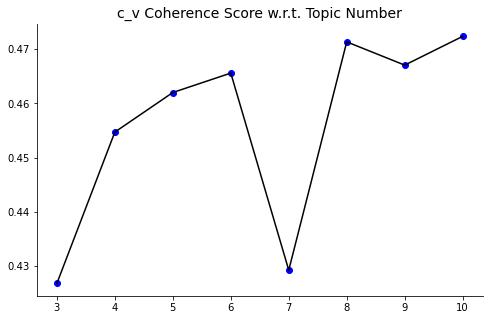

In [8]:
#print(f'Topic number selection took {time.time()-begin_time} seconds')

fig,ax = plt.subplots(figsize=(8,5))
ax.plot(range(3,11),coherence_scores,color='black')
ax.scatter(range(3,11),coherence_scores,marker='o',color='blue')
ax.set_xticks(range(3,11,1))
ax.set_title('c_v Coherence Score w.r.t. Topic Number',fontsize=14)
#ax.set_xlabel('Number of Topics',fontsize=14)
for pos in ['top','right']:
    ax.spines[pos].set_color(None)

In [9]:
end_time = time.time()

print('Estimate runtime: ', (end_time-start_time)/60, ' minutes.')

Estimate runtime:  39.6921435435613  minutes.


In [10]:
import winsound
duration = 1000  # milliseconds
freq = 440  # Hz
    
winsound.Beep(freq, duration)